of data https://www.kaggle.com/competitions/tabular-playground-series-apr-2022

# 데이터 가져오기

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
!cp /gdrive/MyDrive/tmp/tabular-playground-series-apr-2022.zip ./

In [3]:
!unzip -f tabular-playground-series-apr-2022.zip

Archive:  tabular-playground-series-apr-2022.zip


In [4]:
!ls -al

total 753072
drwxr-xr-x 1 root root      4096 Jun 28 07:39 .
drwxr-xr-x 1 root root      4096 Jun 28 06:02 ..
drwxr-xr-x 4 root root      4096 Jun 15 13:41 .config
drwxr-xr-x 1 root root      4096 Jun 15 13:42 sample_data
-rw-r--r-- 1 root root     97759 Mar  9 14:07 sample_submission.csv
-rw-r--r-- 1 root root     97759 Jun 28 07:40 submission.csv
-rw------- 1 root root 179626323 Jun 28 07:53 tabular-playground-series-apr-2022.zip
-rw-r--r-- 1 root root 189323249 Mar  9 14:07 test.csv
-rw-r--r-- 1 root root 401767146 Mar  9 14:07 train.csv
-rw-r--r-- 1 root root    196649 Mar  9 14:08 train_labels.csv


# 데이터 로딩

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train_x_df = pd.read_csv("train.csv")
print(train_x_df)

         sequence  subject  step  sensor_00  sensor_01  sensor_02  sensor_03  \
0               0       47     0  -0.196291   0.112395   1.000000   0.329204   
1               0       47     1  -0.447450   0.134454   1.000000  -0.658407   
2               0       47     2   0.326893  -0.694328   1.000000   0.330088   
3               0       47     3   0.523184   0.751050   1.000000   0.976991   
4               0       47     4   0.272025   1.074580   1.000000  -0.136283   
...           ...      ...   ...        ...        ...        ...        ...   
1558075     25967      327    55  -0.282844  -1.217437  -1.666153   0.586726   
1558076     25967      327    56   0.130603   0.349790  -1.666153  -0.324779   
1558077     25967      327    57  -0.579598   0.429622  -1.666153   0.319469   
1558078     25967      327    58   1.278980   1.711134  -1.522820   0.802655   
1558079     25967      327    59  -1.136012  -3.702731  -1.332820  -0.766372   

         sensor_04  sensor_05  sensor_0

In [7]:
train_y_df = pd.read_csv("train_labels.csv")

In [8]:
print(train_y_df)

       sequence  state
0             0      0
1             1      1
2             2      1
3             3      1
4             4      1
...         ...    ...
25963     25963      1
25964     25964      0
25965     25965      1
25966     25966      1
25967     25967      0

[25968 rows x 2 columns]


In [9]:
test_x_df = pd.read_csv("test.csv")
print(test_x_df)

        sequence  subject  step  sensor_00  sensor_01  sensor_02  sensor_03  \
0          25968      684     0   2.427357  19.639706    1.00000  -1.466372   
1          25968      684     1  -4.950541 -21.747899    1.00000   0.983186   
2          25968      684     2   1.136012 -10.756303    1.00000   1.016814   
3          25968      684     3   0.806028   6.504202    1.00000  -0.179646   
4          25968      684     4   1.288253   5.552521    1.00000  -0.493805   
...          ...      ...   ...        ...        ...        ...        ...   
733075     38185      773    55   0.211747   2.005252   -1.33282   0.695575   
733076     38185      773    56  -0.826121  -2.468487   -1.33282   0.381416   
733077     38185      773    57   0.755023   1.469538   -1.33282  -1.253097   
733078     38185      773    58  -0.187017   0.714286   -1.33282   0.077876   
733079     38185      773    59  -0.414992  -2.858193   -1.33282   1.061062   

        sensor_04  sensor_05  sensor_06  sensor_07 

In [10]:
test_y_df = pd.read_csv("sample_submission.csv")
print(test_y_df)

       sequence  state
0         25968      0
1         25969      0
2         25970      0
3         25971      0
4         25972      0
...         ...    ...
12213     38181      0
12214     38182      0
12215     38183      0
12216     38184      0
12217     38185      0

[12218 rows x 2 columns]


# 이상치 처리

In [11]:
print(train_x_df.quantile(0.01))
print(train_x_df.quantile(0.99))

sequence     259.000000
subject        3.000000
step           0.000000
sensor_00     -4.148377
sensor_01     -4.853992
sensor_02     -2.665639
sensor_03     -4.347973
sensor_04     -5.265930
sensor_05     -4.792977
sensor_06     -4.151184
sensor_07     -4.352672
sensor_08     -6.100000
sensor_09     -4.906069
sensor_10     -5.566257
sensor_11     -5.070175
sensor_12   -128.345222
Name: 0.01, dtype: float64
sequence     25708.000000
subject        665.000000
step            59.000000
sensor_00        4.400309
sensor_01        5.200630
sensor_02        1.333333
sensor_03        4.460177
sensor_04        5.297758
sensor_05        4.424084
sensor_06        4.311475
sensor_07        4.605344
sensor_08        6.100000
sensor_09        4.961705
sensor_10        5.550236
sensor_11        5.228395
sensor_12      129.839591
Name: 0.99, dtype: float64


In [12]:
percentile_min = {}
percentile_max = {}

for column_name in train_x_df.columns:
    if column_name[:7] != "sensor_":continue
    percentile_min[column_name] = train_x_df[column_name].quantile(0.01)
    percentile_max[column_name] = train_x_df[column_name].quantile(0.99)
print(percentile_min)
print(percentile_max)

{'sensor_00': -4.1483771251932, 'sensor_01': -4.853991596638656, 'sensor_02': -2.6656394453004624, 'sensor_03': -4.347973451327432, 'sensor_04': -5.265930214437102, 'sensor_05': -4.792976813762152, 'sensor_06': -4.151183970856102, 'sensor_07': -4.352671755725191, 'sensor_08': -6.1, 'sensor_09': -4.9060693641618505, 'sensor_10': -5.566257262375087, 'sensor_11': -5.070174897119342, 'sensor_12': -128.34522165387895}
{'sensor_00': 4.400309119010819, 'sensor_01': 5.20063025210084, 'sensor_02': 1.3333333333333333, 'sensor_03': 4.460176991150442, 'sensor_04': 5.297757760877689, 'sensor_05': 4.424083769633508, 'sensor_06': 4.311475409836066, 'sensor_07': 4.605343511450381, 'sensor_08': 6.1, 'sensor_09': 4.961705202312139, 'sensor_10': 5.550235591447815, 'sensor_11': 5.228395061728396, 'sensor_12': 129.83959079283875}


sensor_00


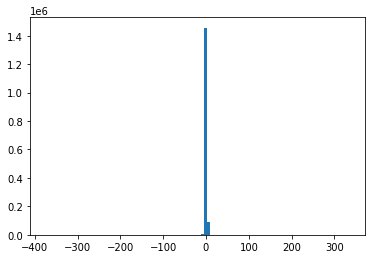

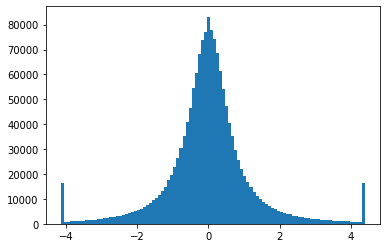

sensor_01


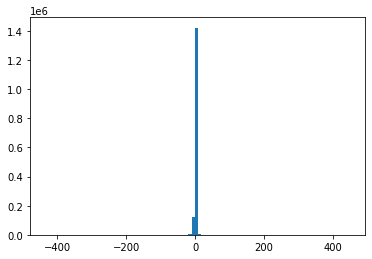

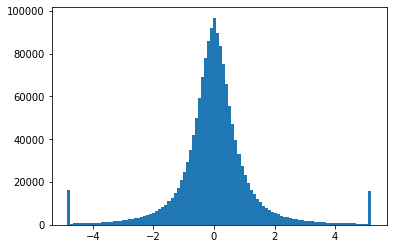

sensor_02


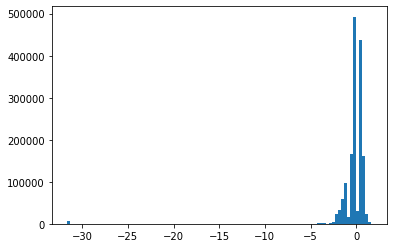

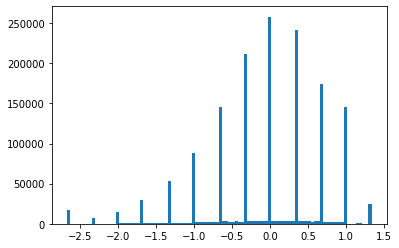

sensor_03


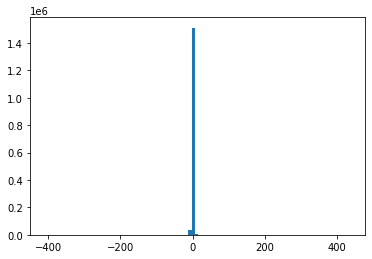

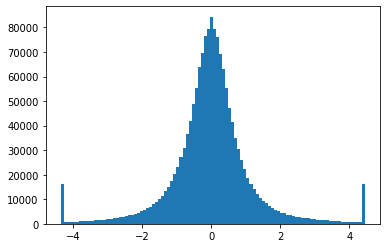

sensor_04


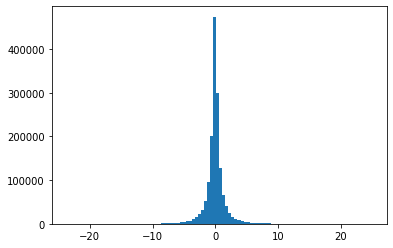

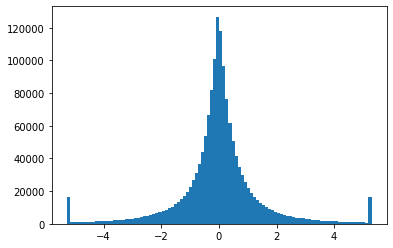

sensor_05


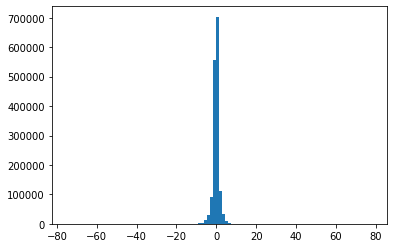

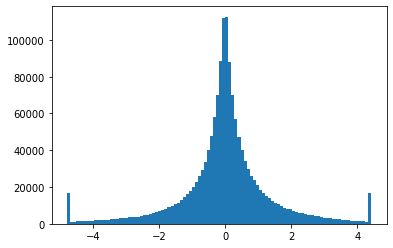

sensor_06


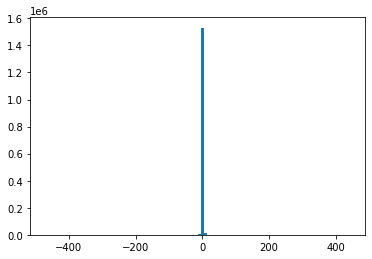

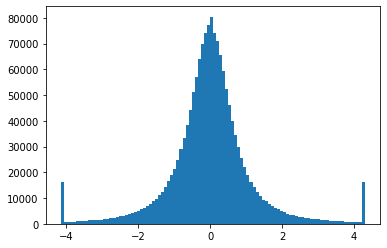

sensor_07


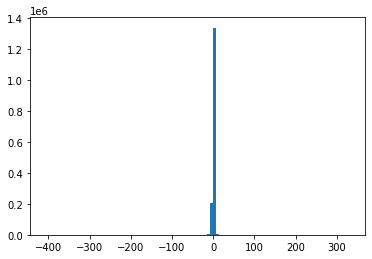

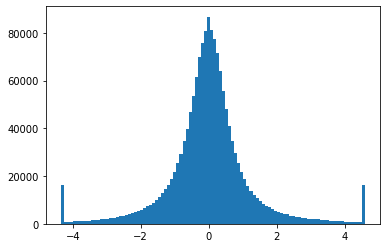

sensor_08


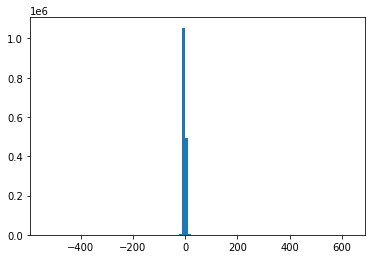

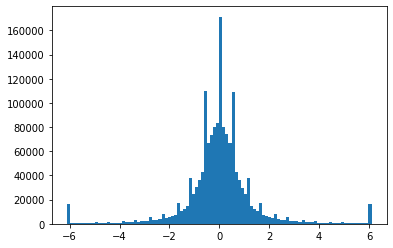

sensor_09


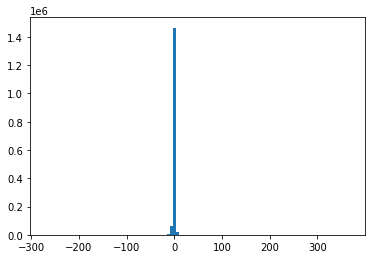

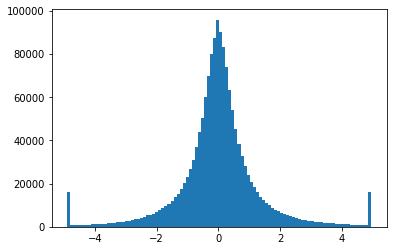

sensor_10


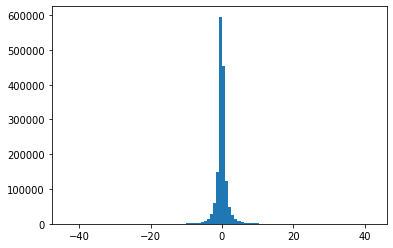

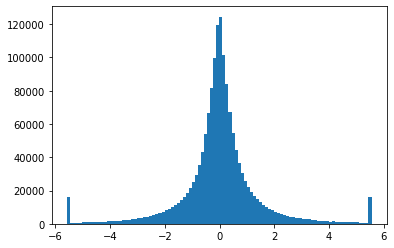

sensor_11


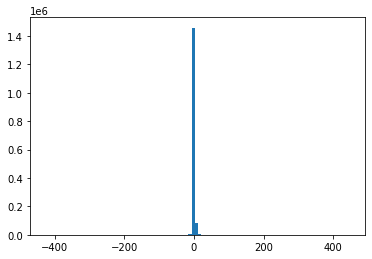

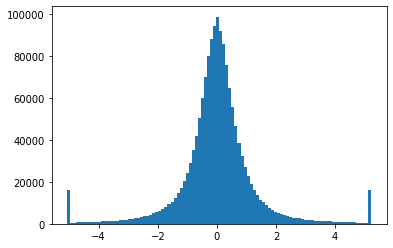

sensor_12


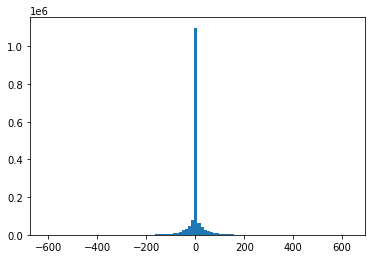

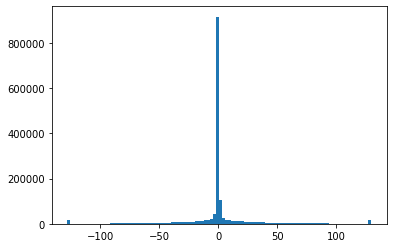

In [13]:
for column_name in train_x_df.columns:
    if column_name[:7] != "sensor_":continue

    print(column_name)

    plt.hist(train_x_df[column_name], bins=100)
    plt.show()

    train_x_df.loc[train_x_df[column_name]<percentile_min[column_name], column_name] = percentile_min[column_name]
    train_x_df.loc[train_x_df[column_name]>percentile_max[column_name], column_name] = percentile_max[column_name]

    plt.hist(train_x_df[column_name], bins=100)
    plt.show()


In [14]:
for column_name in test_x_df.columns:
    if column_name[:7] != "sensor_":continue
    test_x_df.loc[test_x_df[column_name]<percentile_min[column_name], column_name] = percentile_min[column_name]
    test_x_df.loc[test_x_df[column_name]>percentile_max[column_name], column_name] = percentile_max[column_name]


# numpy로 받기

In [24]:
train_x = np.empty((len(train_y_df), 60, 13))
train_y = np.empty((len(train_y_df),1))

In [25]:
test_x = np.empty((len(test_y_df), 60, 13))
test_y = np.empty((len(test_y_df),1))

In [26]:
raw_train_x = train_x_df.to_numpy()
raw_train_y = train_y_df.to_numpy()

In [18]:
raw_test_x = test_x_df.to_numpy()
raw_test_y = test_y_df.to_numpy()

In [28]:
for i in range(len(train_x)):
    train_x[i,:,:] = raw_train_x[i*60:(i+1)*60,3:]

In [29]:
train_y = raw_train_y[:,1]

In [30]:
for i in range(len(test_x)):
    test_x[i,:,:] = raw_test_x[i*60:(i+1)*60,3:]

In [31]:
test_y = raw_test_y[:,1]

# 모델 학습

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 256)              145408    
 nal)                                                            
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
 batch_normalization_1 (Batc  (None, 10)              

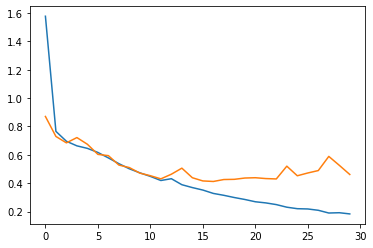

382/382 [==============================] - 2s 6ms/step - loss: 1.7776 - acc: 0.5030
loss= 1.7776073217391968
acc= 0.5030283331871033


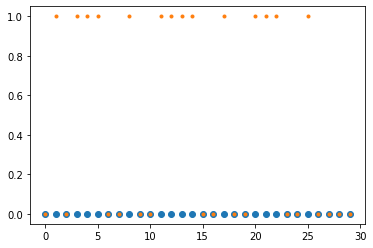

In [34]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Bidirectional(LSTM(128)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10, activation="relu", kernel_regularizer=l1()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=30, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], '.')
plt.show()

# submission 파일 만들기

In [35]:
predicted = model.predict(test_x)
print(predicted[:10])
predicted = np.argmax(predicted, axis=1)
print(predicted[:10])

[[0.6524513  0.34754872]
 [0.01060238 0.98939764]
 [0.99886143 0.00113854]
 [0.00647762 0.99352235]
 [0.04862731 0.9513727 ]
 [0.02352054 0.9764795 ]
 [0.8124689  0.18753111]
 [0.98847616 0.01152381]
 [0.03068809 0.96931183]
 [0.98854315 0.01145684]]
[0 1 0 1 1 1 0 0 1 0]


In [36]:
test_y_df['state'] = predicted
print(test_y_df)

       sequence  state
0         25968      0
1         25969      1
2         25970      0
3         25971      1
4         25972      1
...         ...    ...
12213     38181      0
12214     38182      0
12215     38183      1
12216     38184      0
12217     38185      0

[12218 rows x 2 columns]


In [37]:
test_y_df.to_csv("submission.csv", index=False)

In [38]:
!ls -al

total 753072
drwxr-xr-x 1 root root      4096 Jun 28 07:39 .
drwxr-xr-x 1 root root      4096 Jun 28 06:02 ..
drwxr-xr-x 4 root root      4096 Jun 15 13:41 .config
drwxr-xr-x 1 root root      4096 Jun 15 13:42 sample_data
-rw-r--r-- 1 root root     97759 Mar  9 14:07 sample_submission.csv
-rw-r--r-- 1 root root     97759 Jun 28 08:03 submission.csv
-rw------- 1 root root 179626323 Jun 28 07:53 tabular-playground-series-apr-2022.zip
-rw-r--r-- 1 root root 189323249 Mar  9 14:07 test.csv
-rw-r--r-- 1 root root 401767146 Mar  9 14:07 train.csv
-rw-r--r-- 1 root root    196649 Mar  9 14:08 train_labels.csv


In [39]:
!head submission.csv

sequence,state
25968,0
25969,1
25970,0
25971,1
25972,1
25973,1
25974,0
25975,0
25976,1
